In [ ]:
from PIL import Image
image =  Image.new('RGB', (1000, 1000), (255, 255, 255))
image.show()
image.save('test.png', 'PNG')

In [9]:
from PIL import Image
im = Image.open(r'C:\Users\USER\Skripsi\bent_image.png')
imr = im.rotate(45)
imrb = imr.rotate(30)
imrb.show()

In [10]:
import cv2
import numpy as np

# Load the source image
image_path = r'C:\Users\USER\test.png'  # Use 'r' before the path to interpret it as a raw string
img = cv2.imread(image_path)

# Define the transformation matrix for y-axis warping
M = np.float32([[1, 0, 0],       # No change along x-axis
                [0.5, 1, 0],     # Scale y-axis by 0.2
                [0, 0, 1]])      # Homogeneous coordinate

# Apply the perspective transformation
rows, cols, _ = img.shape
warped_img = cv2.warpPerspective(img, M, (cols, rows))

# Display the original and warped images
cv2.imshow('Original Image', img)
cv2.imshow('Warped Image (Y-axis)', warped_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Bend downward
# Sinklin
import cv2
import numpy as np

def bend_image(image, bend_factor):
    height, width, _ = image.shape
    bent_img = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_x = x
            new_y = int(y + bend_factor * x * (width - x) / width)
            if 0 <= new_x < width and 0 <= new_y < height:
                bent_img[new_y, new_x] = image[y, x]

    return bent_img

# Create a white blank image
height, width = 1000, 1000
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Apply bending effect
bend_factor = 0.3  # Adjust this value for desired bending
bent_img = bend_image(image, bend_factor)

# Display and save the bent image
cv2.imshow('Bent Image', bent_img)
cv2.imwrite('bent_image.png', bent_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [1]:
# Bend upward
# Antiklin
import cv2
import numpy as np
import random

def bend_image(image, bend_factor):
    height, width, _ = image.shape
    bent_img = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_x = x
            new_y = int(y - bend_factor * x * (width - x) / width)
            if 0 <= new_x < width and 0 <= new_y < height:
                bent_img[new_y, new_x] = image[y, x]

    return bent_img

# Create a white blank image
height, width = 1000, 1000
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Apply bending effect (upward)
bu = random.uniform(0, 2)
bend_factor = bu # Adjust this value for desired bending
bent_img = bend_image(image, bend_factor)

# Display and save the bent image
cv2.imshow('Bent Image', bent_img)
cv2.imwrite('bent_image_upward.png', bent_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Image offset
# Sesar

import cv2
import numpy as np

# Create a white blank image
height, width = 1000, 1000
image = np.ones((height, width, 3), dtype=np.uint8) * 255

# Define the offset amount along the y-axis (in pixels)
offset = 200

# Split the image into two halves
left_half = image[:, :width // 2]
right_half = image[:, width // 2:]

# Create a black canvas for the offset side
offset_side = np.zeros_like(right_half)

# Offset the offset_side along the y-axis
offset_side[offset:, :] = right_half[:-offset, :]

# Combine the left_half and the offset_side
result_image = np.hstack((left_half, offset_side))

# Save and display the result image
cv2.imshow('Result Image', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
# Bend downward to test something

import cv2
import numpy as np

def bend_image(image, bend_factor):
    height, width, _ = image.shape
    bent_img = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_x = x
            new_y = int(y + bend_factor * x * (width - x) / width)
            if 0 <= new_x < width and 0 <= new_y < height:
                bent_img[new_y, new_x] = image[y, x]

    return bent_img

# Create a white blank image
height, width = 1000, 1000
image = cv2.imread('Colour.png')

# Apply bending effect
bend_factor = 0.3  # Adjust this value for desired bending
bent_img = bend_image(image, bend_factor)

# Display and save the bent image
cv2.imshow('Bent Image', bent_img)
cv2.imwrite('bent_image.png', bent_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


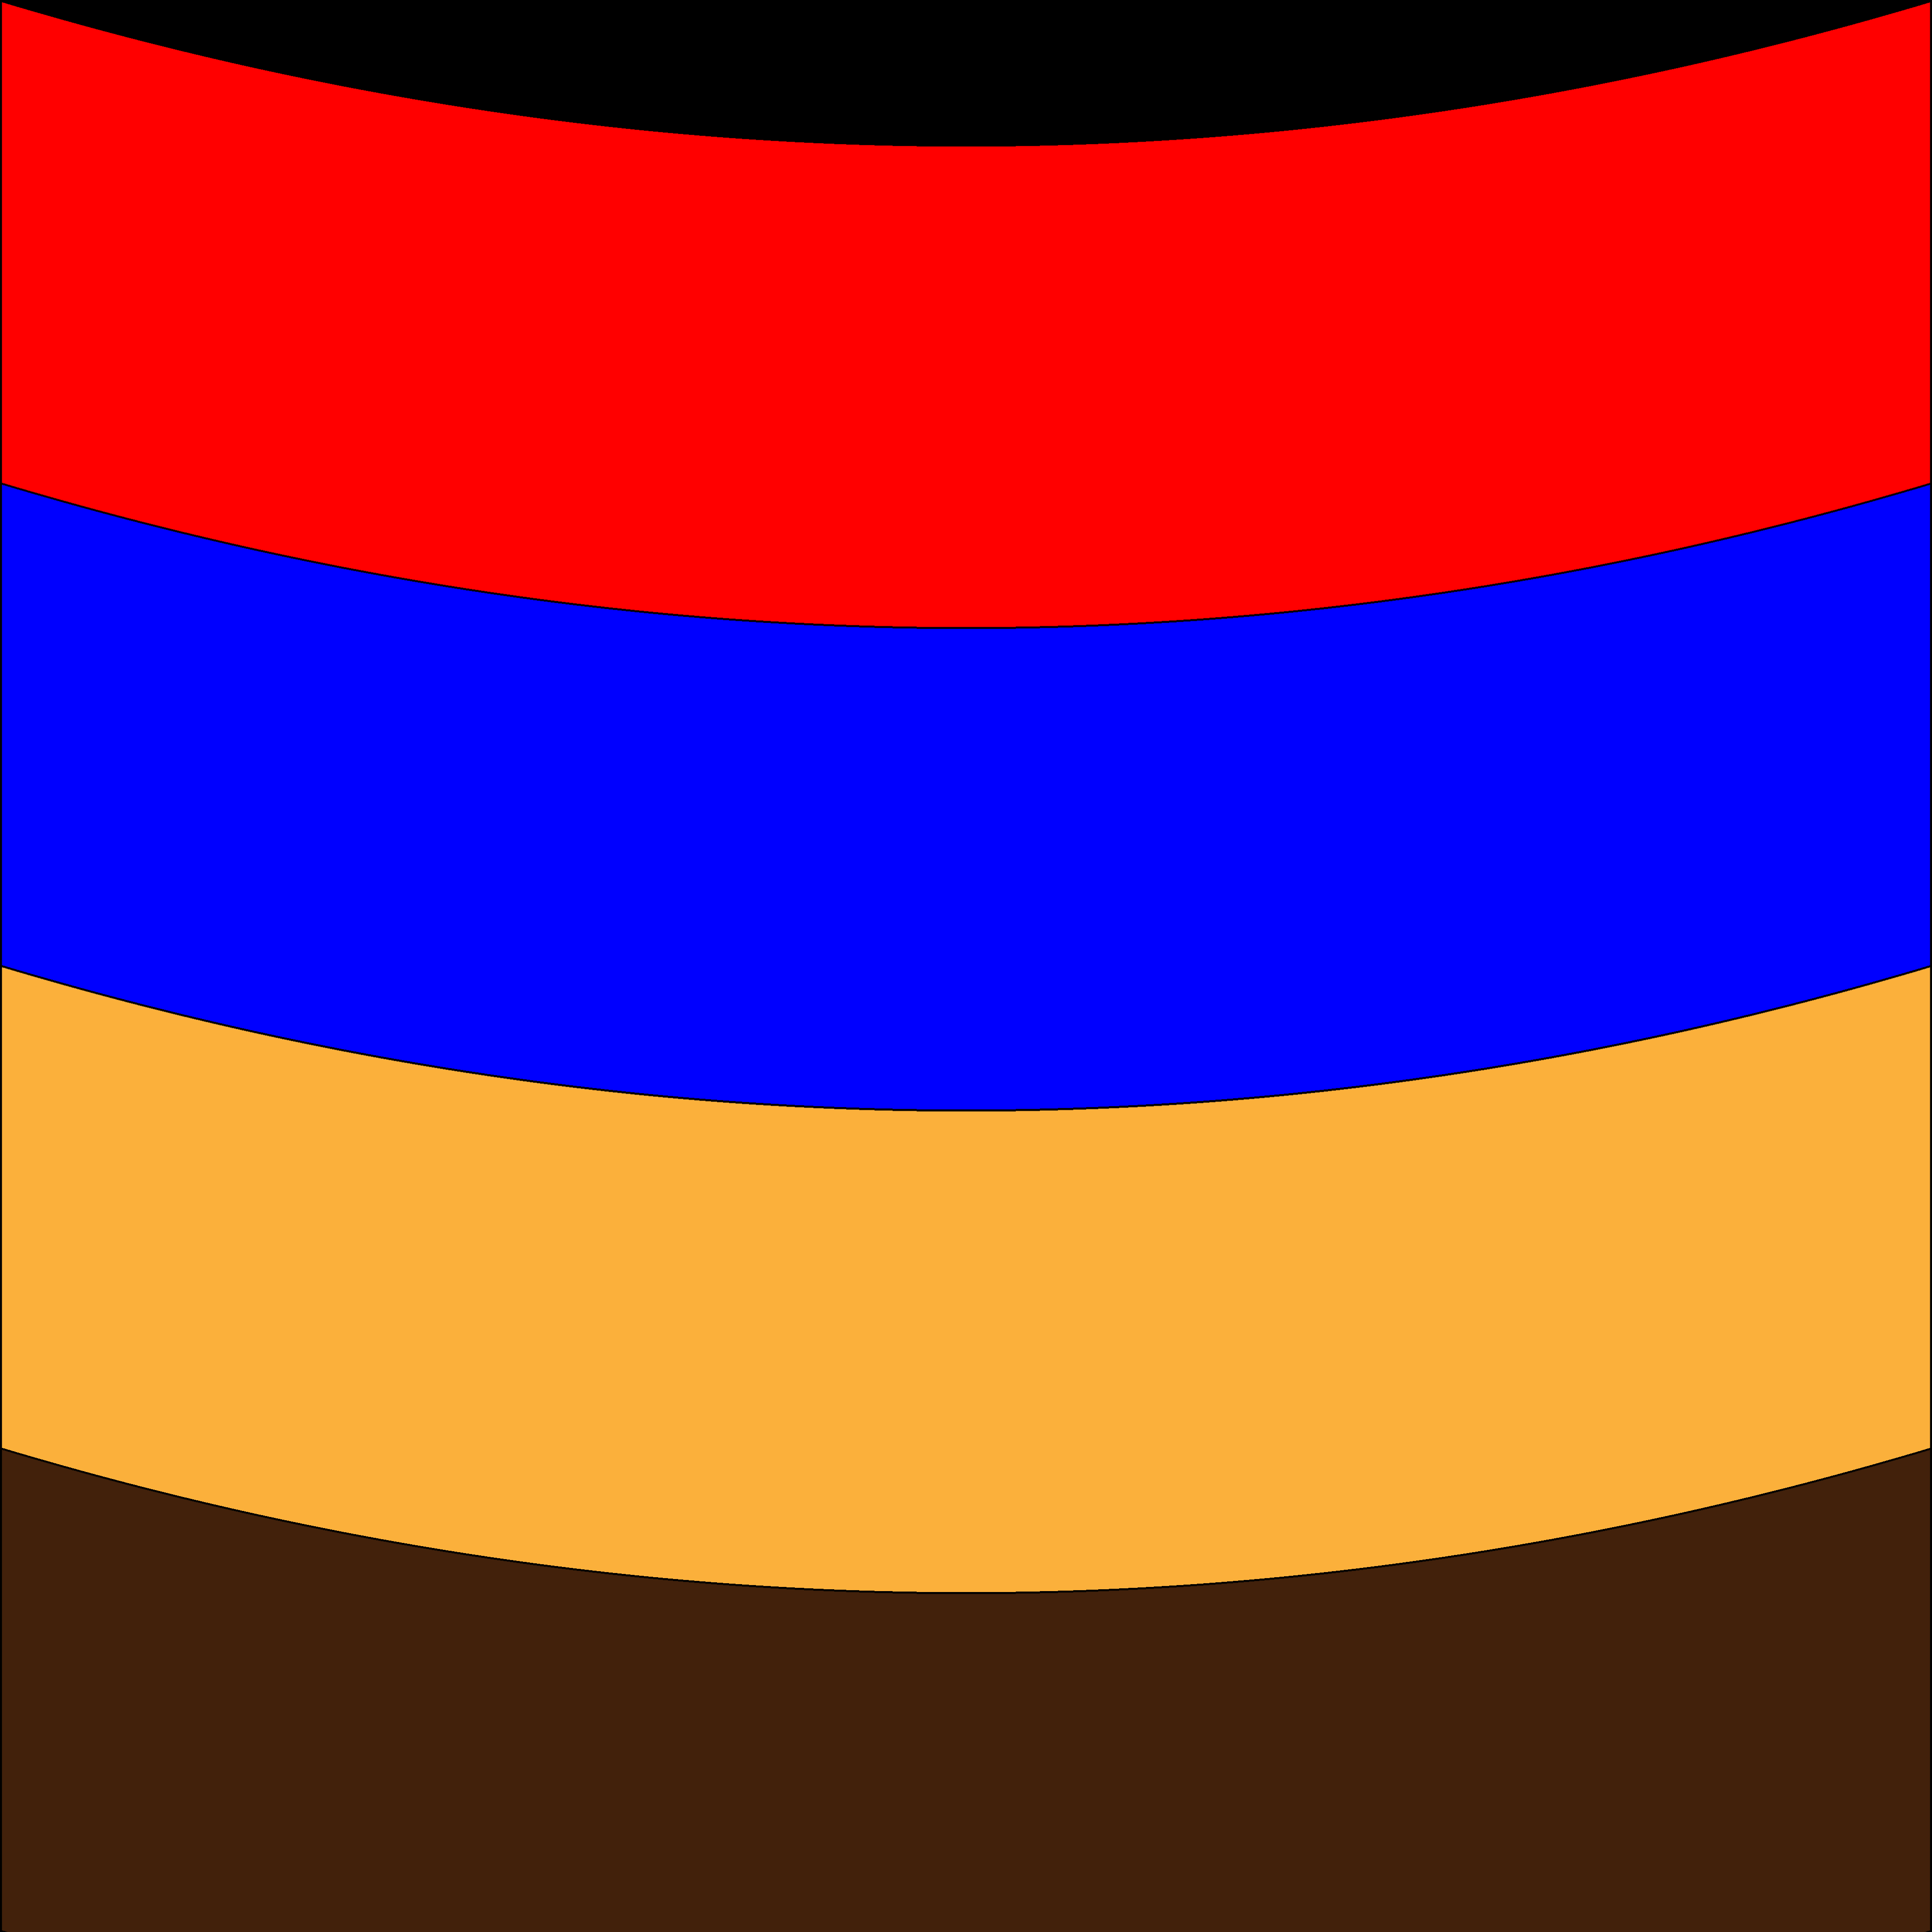

In [1]:
# Test Run

import cv2
import numpy as np
from IPython.display import display, Image

def bend_image(image, bend_factor):
    height, width, _ = image.shape
    bent_img = np.zeros_like(image)

    for y in range(height):
        for x in range(width):
            new_x = x
            new_y = int(y + bend_factor * x * (width - x) / width)
            if 0 <= new_x < width and 0 <= new_y < height:
                bent_img[new_y, new_x] = image[y, x]

    return bent_img

# Load an existing image
image = cv2.imread('Colour.png')

# Check if the image was successfully loaded
if image is not None:
    # Apply bending effect
    bend_factor = 0.3  # Adjust this value for desired bending
    bent_img = bend_image(image, bend_factor)

    # Display the bent image below the code cell
    display(Image(data=cv2.imencode('.png', bent_img)[1].tobytes()))
else:
    print('Image not found or could not be loaded.')


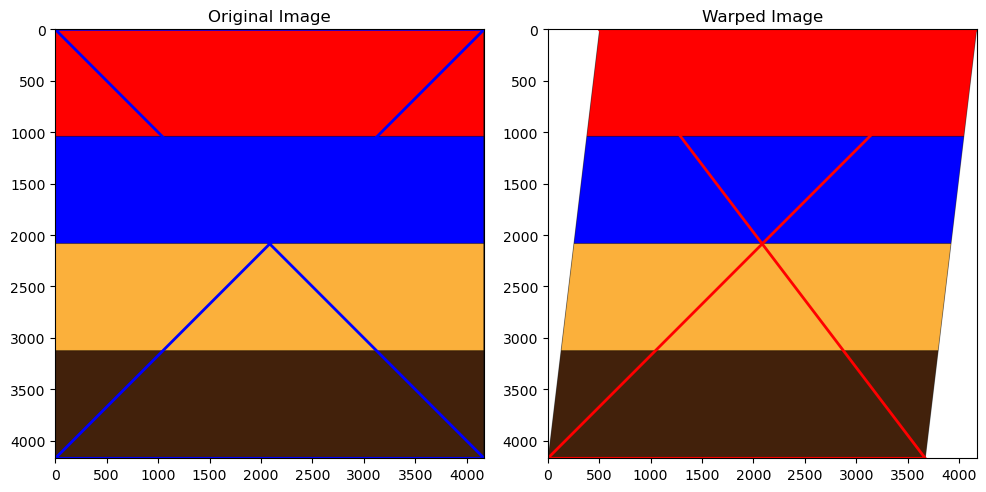

In [17]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
import numpy as np

# Load the image
image_path = 'Colour.png'
image = Image.open(image_path)

# Create a figure and axis for displaying the original image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax[0].imshow(image)
ax[0].set_title('Original Image')

# Define the corners of the parallelogram
original_corners = np.float32([[0, 0], [image.size[0], 0], [0, image.size[1]], [image.size[0], image.size[1]]])
offset = 500
transformed_corners = np.float32([[offset, 0], [image.size[0], 0], [0, image.size[1]], [image.size[0] - offset, image.size[1]]])

# Create a custom transformation matrix
matrix = cv2.getPerspectiveTransform(original_corners, transformed_corners)

# Apply the transformation to the image
transformed_image = cv2.warpPerspective(np.array(image), matrix, (image.size[0], image.size[1]))

# Display the transformed image
ax[1].imshow(transformed_image)
ax[1].set_title('Warped Image')

# Display the parallelogram on the original image plot
original_poly = Polygon(original_corners, edgecolor='b', fill=None, lw=2)
ax[0].add_patch(original_poly)

# Display the parallelogram on the transformed image plot
transformed_poly = Polygon(transformed_corners, edgecolor='r', fill=None, lw=2)
ax[1].add_patch(transformed_poly)

plt.tight_layout()
plt.show()


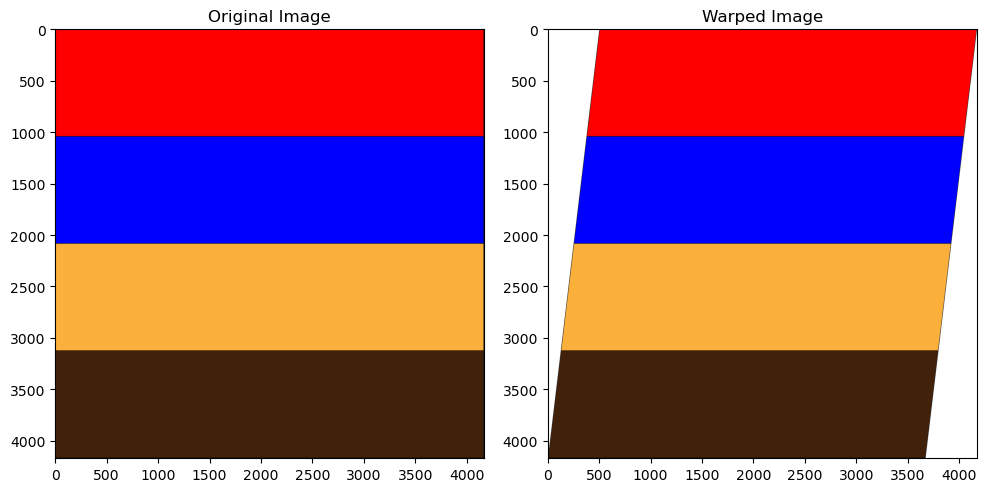

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the image
image_path = 'Colour.png'
image = Image.open(image_path)

# Create a figure and axis for displaying the original image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image
ax[0].imshow(image)
ax[0].set_title('Original Image')

# Define the corners of the parallelogram
original_corners = np.float32([[0, 0], [image.size[0], 0], [0, image.size[1]], [image.size[0], image.size[1]]])
offset = 500
transformed_corners = np.float32([[offset, 0], [image.size[0], 0], [0, image.size[1]], [image.size[0] - offset, image.size[1]]])

# Create a custom transformation matrix
matrix = cv2.getPerspectiveTransform(original_corners, transformed_corners)

# Apply the transformation to the image
transformed_image = cv2.warpPerspective(np.array(image), matrix, (image.size[0], image.size[1]))

# Display the transformed image
ax[1].imshow(transformed_image)
ax[1].set_title('Warped Image')

plt.tight_layout()
plt.show()


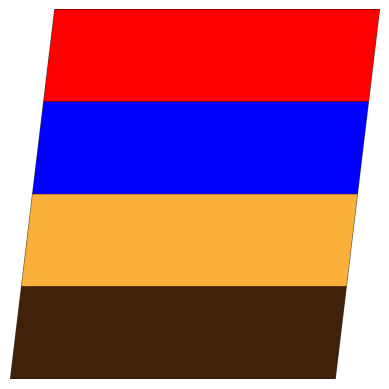

In [23]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np

# Load the image
image_path = 'Colour.png'
image = Image.open(image_path)

# Define the corners of the parallelogram
original_corners = np.float32([[0, 0], [image.size[0], 0], [0, image.size[1]], [image.size[0], image.size[1]]])
offset = 500
transformed_corners = np.float32([[offset, 0], [image.size[0], 0], [0, image.size[1]], [image.size[0] - offset, image.size[1]]])

# Create a custom transformation matrix
matrix = cv2.getPerspectiveTransform(original_corners, transformed_corners)

# Apply the transformation to the image
transformed_image = cv2.warpPerspective(np.array(image), matrix, (image.size[0], image.size[1]))

# Display the transformed image without axis and title
plt.imshow(transformed_image)
plt.axis('off')  # Turn off axis
plt.title(None)  # Remove title
plt.show()


In [25]:
import cv2
from PIL import Image
import numpy as np

# Load the image
image_path = 'Colour.png'
image = Image.open(image_path)

# Define the corners of the parallelogram
original_corners = np.float32([[0, 0], [image.size[0], 0], [0, image.size[1]], [image.size[0], image.size[1]]])
offset = 500
transformed_corners = np.float32([[offset, 0], [image.size[0], 0], [0, image.size[1]], [image.size[0] - offset, image.size[1]]])

# Create a custom transformation matrix
matrix = cv2.getPerspectiveTransform(original_corners, transformed_corners)

# Apply the transformation to the image
transformed_image = cv2.warpPerspective(np.array(image), matrix, (image.size[0], image.size[1]))

# Save the transformed image
transformed_image_path = 'Warped_Image.png'
Image.fromarray(transformed_image).save(transformed_image_path)
